In [1]:
import sympy as sy
import networkx as nx
from pycqed import parameters as p

In [23]:
c = p.ParamCollection(["C1", "C2"])

In [24]:
c.addParameter("C00")
C1 = c.getSymbol("C1")
C2 = c.getSymbol("C2")
c.addParameterisation("C00", C1 + C2)

c.addParameter("C00i")
C00 = c.getSymbol("C00")
c.addParameterisation("C00i", 1/C00)

c.addParameter("C11i")
c.addParameterisation("C11i", 2/C00)

c.addParameter("X1")
C00i = c.getSymbol("C00i")
C11i = c.getSymbol("C11i")
c.addParameterisation("X1", 0.5*C00i/C11i**2)

c.addParameter("Z1")
X1 = c.getSymbol("X1")
c.addParameterisation("Z1", X1 + 0.5*C11i/C2**2)

In [25]:
c.setParameterValues("C1", 0.7, "C2", 1.0)

In [26]:
c.getParameterValue("C00")

1.7

In [27]:
c.getParameterValue("C00i")

0.5882352941176471

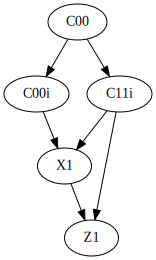

In [28]:
c.drawParameterisationGraph()

In [29]:
def exprParameterised(expr):
    pp = c.getParametricParametersList()
    for sym in list(expr.free_symbols):
        p = c.getParameterFromSymbol(sym)
        if p in pp:
            return True
    return False

In [30]:
base = c.getParametricExpression("Z1")
while exprParameterised(base):
    expr = None
    for sym in base.free_symbols:
        try:
            subs = {sym: c.getParametricExpression(c.getParameterFromSymbol(sym))}
            expr = base.subs(subs)
        except:
            continue
    base = expr

In [31]:
base

0.125*C_{1} + 0.125*C_{2} + 1.0/(C_{2}**2*(C_{1} + C_{2}))

In [32]:
sy.

AttributeError: module 'sympy' has no attribute 'Eye'

In [2]:
collection = p.ParamCollection(["C1", "C2", "I1", "I2"])

In [3]:
collection.getParameterList()

{'C1': <pycqed.parameters.Param at 0x7fc7b776b8b0>,
 'C2': <pycqed.parameters.Param at 0x7fc7b776bdc0>,
 'I1': <pycqed.parameters.Param at 0x7fc7b776b850>,
 'I2': <pycqed.parameters.Param at 0x7fc7b776bb50>}

In [4]:
collection.getParameterValuesDict()

{'C1': None, 'C2': None, 'I1': None, 'I2': None}

In [5]:
collection.getSymbolList()

{'C1': C_{1}, 'C2': C_{2}, 'I1': I_{1}, 'I2': I_{2}}

In [6]:
collection.getSymbolValuesDict()

{C_{1}: None, C_{2}: None, I_{1}: None, I_{2}: None}

In [7]:
collection.getParameterNamesList()

['C1', 'C2', 'I1', 'I2']

In [8]:
collection.getParameterSymbolsList()

[C_{1}, C_{2}, I_{1}, I_{2}]

In [9]:
params = collection.getSymbols("E", "d", "A", "b")

In [10]:
collection.addParameterisation("C1", params["E"]/params["d"])
collection.addParameterisation("I1", params["A"]/params["b"])

In [11]:
collection.getSymbolList()

{'C1': C_{1},
 'C2': C_{2},
 'I1': I_{1},
 'I2': I_{2},
 'E': E_{},
 'd': d_{},
 'A': A_{},
 'b': b_{}}

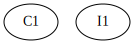

In [12]:
collection.drawParameterisationGraph()

In [13]:
collection.setParameterValues("E", 0.1, "C2", 9.0, "d", 0.1, "I2", 0.4, "A", 8.0, "b", 2.0)

In [14]:
collection.allParametersSet()

True

In [15]:
collection.getParameterValuesDict()

{'C1': 1.0,
 'C2': 9.0,
 'I1': 4.0,
 'I2': 0.4,
 'E': 0.1,
 'd': 0.1,
 'A': 8.0,
 'b': 2.0}

In [16]:
collection.addParameterisation("E", collection.getSymbol("C2")*0.5)

In [17]:
collection.setParameterValues("C2", 9.0, "d", 0.1, "I2", 0.4, "A", 8.0, "b", 2.0)

In [18]:
collection.getParameterValuesDict()

{'C1': 1.0,
 'C2': 9.0,
 'I1': 4.0,
 'I2': 0.4,
 'E': 4.5,
 'd': 0.1,
 'A': 8.0,
 'b': 2.0}

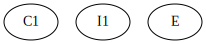

In [19]:
collection.drawParameterisationGraph()

In [20]:
collection.addParameter("X")

In [21]:
collection.addParameterisation("X", collection.getSymbol("C1")*collection.getSymbol("E"))

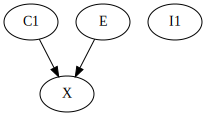

In [22]:
collection.drawParameterisationGraph()

In [23]:
collection.getParameterValuesDict()

{'C1': 1.0,
 'C2': 9.0,
 'I1': 4.0,
 'I2': 0.4,
 'E': 4.5,
 'd': 0.1,
 'A': 8.0,
 'b': 2.0,
 'X': None}

In [24]:
collection.setParameterValues("C2", 9.0, "d", 0.1, "I2", 0.4, "A", 8.0, "b", 2.0)

In [25]:
collection.getParameterValuesDict()

{'C1': 45.0,
 'C2': 9.0,
 'I1': 4.0,
 'I2': 0.4,
 'E': 4.5,
 'd': 0.1,
 'A': 8.0,
 'b': 2.0,
 'X': 202.5}

In [34]:
c = p.ParamCollection(["C1", "C2", "C3", "C4", "C5"])
Nn = 2
M = sy.eye(Nn) - sy.eye(Nn)
M[0, 0] += c.getSymbol("C1")+c.getSymbol("C2")
M[0, 1] += -c.getSymbol("C3")-c.getSymbol("C4")
M[1, 0] += -c.getSymbol("C3")-c.getSymbol("C4")
M[1, 1] += c.getSymbol("C5")

In [35]:
M

Matrix([
[ C_{1} + C_{2}, -C_{3} - C_{4}],
[-C_{3} - C_{4},          C_{5}]])

In [36]:
M.shape

(2, 2)

In [40]:
# Diagonals
Mn = sy.eye(Nn) - sy.eye(Nn)
for i in range(M.shape[0]):
    elem = "C%i%i" % (i, i)
    c.addParameter(elem)
    c.addParameterisation(elem, M[i, i])
    Mn[i, i] = c.getSymbol(elem)

# Off-diagonals
elem = "C01"
c.addParameter(elem)
c.addParameterisation(elem, M[0, 1])
Mn[0, 1] = c.getSymbol(elem)
Mn[1, 0] = c.getSymbol(elem)
Mn

Matrix([
[C_{00}, C_{01}],
[C_{01}, C_{11}]])

In [41]:
Minv = M**(-1)

In [42]:
Minv

Matrix([
[          C_{5}/(C_{1}*C_{5} + C_{2}*C_{5} - C_{3}**2 - 2*C_{3}*C_{4} - C_{4}**2), (C_{3} + C_{4})/(C_{1}*C_{5} + C_{2}*C_{5} - C_{3}**2 - 2*C_{3}*C_{4} - C_{4}**2)],
[(C_{3} + C_{4})/(C_{1}*C_{5} + C_{2}*C_{5} - C_{3}**2 - 2*C_{3}*C_{4} - C_{4}**2), (C_{1} + C_{2})/(C_{1}*C_{5} + C_{2}*C_{5} - C_{3}**2 - 2*C_{3}*C_{4} - C_{4}**2)]])

In [43]:
Mninv = Mn**(-1)

In [44]:
Mninv

Matrix([
[ C_{11}/(C_{00}*C_{11} - C_{01}**2), -C_{01}/(C_{00}*C_{11} - C_{01}**2)],
[-C_{01}/(C_{00}*C_{11} - C_{01}**2),  C_{00}/(C_{00}*C_{11} - C_{01}**2)]])

In [71]:
C1, C2 = sy.symbols("C_{1r} C_{c}")

In [72]:
expr = C1 + C2
expr

C_{1r} + C_{c}

In [91]:
C1s, C2s = sy.symbols("Z_{1r} f_{1r}")
subs = {C1s: 6.696, C2s: 50.0}

In [92]:
expr = 159.154943091895*C1s/C2s
expr

159.154943091895*Z_{1r}/f_{1r}

In [93]:
for i in range(1000000):
    float(expr.subs(subs))

In [96]:
complex(expr.subs(subs).evalf())

(21.31402997886658+0j)